## Libraries

In [20]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()

## Download the USE module

In [15]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3" 
embed = hub.Module(module_url)

INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_0:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Embeddings_en/sharded_0
INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_1:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Embeddings_en/sharded_1
INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_10:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Embeddings_en/sharded_10
INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_11:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Embeddings_en/sharded_11
INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_12:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Embeddings_en/sharded_12

INFO:tensorflow:Initialize variable module_1/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_1/ffn/conv2/bias:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_1/ffn/conv2/bias
INFO:tensorflow:Initialize variable module_1/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_1/ffn/conv2/kernel:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_1/ffn/conv2/kernel
INFO:tensorflow:Initialize variable module_1/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_1/ffn/layer_prepostprocess/layer_norm/layer_norm_bias:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_1/ffn/layer_prepostprocess/layer_norm/layer_norm_bias
INFO:tensorfl

INFO:tensorflow:Initialize variable module_1/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_3/ffn/conv1/kernel:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_3/ffn/conv1/kernel
INFO:tensorflow:Initialize variable module_1/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_3/ffn/conv2/bias:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_3/ffn/conv2/bias
INFO:tensorflow:Initialize variable module_1/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_3/ffn/conv2/kernel:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_3/ffn/conv2/kernel
INFO:tensorflow:Initialize variable module_1/Encoder_en/Transformer/TransformerEnco

INFO:tensorflow:Initialize variable module_1/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_5/ffn/conv1/bias:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_5/ffn/conv1/bias
INFO:tensorflow:Initialize variable module_1/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_5/ffn/conv1/kernel:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_5/ffn/conv1/kernel
INFO:tensorflow:Initialize variable module_1/Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_5/ffn/conv2/bias:0 from checkpoint b'/tmp/tfhub_modules/96e8f1d3d4d90ce86b2db128249eb8143a91db73/variables/variables' with Encoder_en/Transformer/TransformerEncodeFast/encoder/layer_5/ffn/conv2/bias
INFO:tensorflow:Initialize variable module_1/Encoder_en/Transformer/TransformerEncodeFa

## Generate an embedding for a test sentence

In [16]:
def generate_embedding(messages):
    with tf.Session() as session:
      session.run([tf.global_variables_initializer(), tf.tables_initializer()])
      message_embeddings = session.run(embed(messages))
      for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
        print("Message: {}".format(messages[i]))
        print("Embedding size: {}".format(len(message_embedding)))
        message_embedding_snippet = ", ".join(
            (str(x) for x in message_embedding[:3]))
        print("Embedding: [{}, ...]\n".format(message_embedding_snippet))
    return(message_embeddings[0])

In [17]:
embed = generate_embedding(["How can I reset my password"])

Message: How can I reset my password
Embedding size: 512
Embedding: [0.02555391564965248, -0.03472081199288368, 0.0020717319566756487, ...]



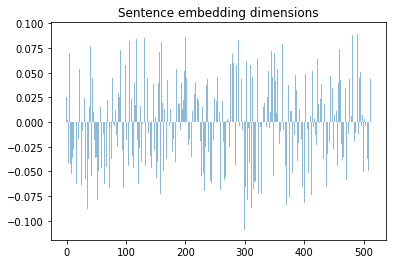

In [34]:
y_pos = np.arange(len(embed)) 
dim = np.arange(len(embed)%16).tolist()
plt.bar(y_pos, embed, align='center', alpha=0.5)
plt.title('Sentence embedding dimensions')
plt.show()